## Data Mining Lab Assignment 1: SMOTE

*Data Mining 2022/2023*  
Created by Aleksander Buszydlik  
Reviewed by Bianca Cosma

**WHAT** This optional lab assignment covers the topics of **SMOTE** and **Tomek Links**. It consists of several programming exercises and insight questions.  

**WHY** Practicing, both through programming and answering the insight questions, aims at deepening your knowledge and preparing you for the exam.  

**HOW** Follow the exercises in this notebook either on your own or with a friend. Use Answers-EWI to discuss the theory questions with your peers. For feedback please consult the TAs during the assigned lab session. The answers to these exercises will not be provided.

**Note:** If you encounter any issues with your notebook, please always use `Kernel` `->` `Restart & Run All` before asking a TA.

### Summary

Sometimes in data mining (and machine learning) tasks we may have to deal with heavily imbalanced datasets. In such cases, we generally expect our algorithms to perform worse. Fortunately, we can attempt to remove the imbalance from the dataset. In this assignment you will have an opportunity to experiment with two oversampling approaches and one undersampling approach.

Let's start by loading the data.

$\textbf{Exercise 1}$: Run the code below to read the datasets from csv files, plot them side by side.

[[ 2.48171066  1.26403288  0.        ]
 [ 0.90961661  0.14996028  0.        ]
 [ 1.11521336  2.25213436  0.        ]
 ...
 [ 1.34176007  0.77546788  1.        ]
 [ 1.91728485 -0.68011624  1.        ]
 [-0.90543814  0.43027133  1.        ]]
[[-2.26744879e-03  1.16290485e+00  0.00000000e+00]
 [ 5.72917805e-01  1.84374145e+00  0.00000000e+00]
 [ 1.38649789e+00 -5.71416679e-01  0.00000000e+00]
 [ 1.58126377e+00  1.25947582e+00  0.00000000e+00]
 [ 1.53754749e+00  1.53592805e+00  0.00000000e+00]
 [ 3.41728485e+00  8.19883759e-01  0.00000000e+00]
 [ 1.16057056e+00  2.15212557e+00  0.00000000e+00]
 [-2.30222695e-01  2.14541573e+00  0.00000000e+00]
 [ 1.10058572e+00  3.58164385e-02  0.00000000e+00]
 [ 2.50724711e+00  4.16997357e-01  0.00000000e+00]
 [ 4.24709910e-01  3.52240507e+00  0.00000000e+00]
 [ 6.47048720e-01  3.95425386e-01  0.00000000e+00]
 [ 1.25613522e+00  3.09709397e+00  0.00000000e+00]
 [ 1.66885282e+00  2.31221809e+00  0.00000000e+00]
 [ 2.00977885e+00  1.80044554e+00  0.00000000e

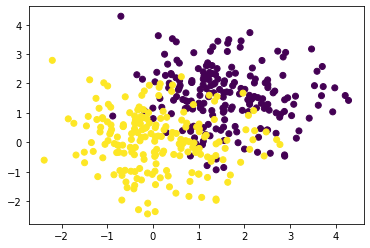

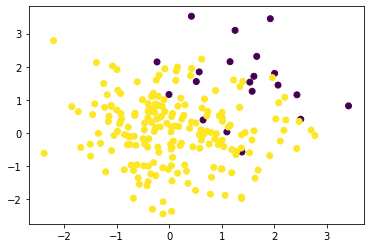

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

random_state = 42
np.random.seed(random_state)

balanced_data = np.loadtxt("balanced_data.csv", delimiter=",")
imbalanced_data = np.loadtxt("imbalanced_data.csv", delimiter=",")

print(balanced_data)
print(imbalanced_data)

plt.scatter(balanced_data[:, 0], balanced_data[:, 1], c = balanced_data[:, 2])
plt.show()
plt.scatter(imbalanced_data[:, 0], imbalanced_data[:, 1], c = imbalanced_data[:, 2])


$\textbf{Exercise 2}$: Check what is the number of positive and negative samples in each of the datasets.

In [2]:
third_column = balanced_data[:, 2]
print(third_column)
num_ones = np.sum(third_column == 1.0)
print(num_ones)
number_ones_balanced = np.count_nonzero(third_column == 0.0)
total_balanced = balanced_data.shape[1]
print(number_ones_balanced)
print(number_ones_balanced/total_balanced)

third_column_unbalanced = imbalanced_data[:, 2]
print(third_column_unbalanced)
num_ones = np.sum(third_column_unbalanced == 1.0)
print(num_ones)
number_ones_imbalanced = np.count_nonzero(third_column_unbalanced == 0.0)
print(number_ones_imbalanced)
total_imbalanced = imbalanced_data.shape[1]
print(number_ones_imbalanced/total_imbalanced)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [3]:
"""
A note on randomness in Python:
Some functions (for instance those from the numpy.random library) generate non-deterministic results.
We can control the randomness to some degree by setting a random seed. In a nutshell, whenever a function using
the random seed is called, the seed will be incremented. However, this makes it difficult to provide you with 
stable assertions to test your code. For instance, if our assertion is based on a function call that
increments the random seed two times, and you introduce one more random operation, the results may be different.
In this lab you will make use of two functions from numpy.random. To help you test your code, we make a small
wrapper around them which sets the random seed just before the function is called. If you would like to make sure that 
our assertions work, use the functions below instead of calling numpy.random directly.
"""

def choice(a, size=None, replace=True, p=None):
    np.random.seed(random_state)
    return np.random.choice(a, size, replace, p)

def uniform(low=0.0, high=1.0, size=None):
    np.random.seed(random_state)
    return np.random.uniform(low, high, size)

We also need a way to assess the performance of a classifier on each dataset. In this lab exercise we will use a `LogisticRegression` classifier from the `scikit-learn` library with default hyper-parameters. We will assess the performance of the classifier using three metrics: the _accuracy_, the _True Positive Rate_ (_TPR_), and the _False Positive Rate_ (_FPR_).

$\textbf{Exercise 3}$: Finish the method `evaluate` according to the provided docstring.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score

def evaluate(data):
    """
    Split the provided `data` into 70% training set and 30% test set, fit a LogisticRegression classifier,
    and evaluate the accuracy, TPR, and FPR on its predictions for the test set.
    
    Args
        data (numpy.ndarray): Dataset containing the features along with their corresponding labels.
        
    Returns
        (float, float, float): Calculated accuracy, True Positive Rate, and False Positive Rate
    """
    
    np.random.seed(random_state)
    X_train, X_test, y_train, y_test = train_test_split(data[:,:-1],data[:,-1], test_size = 0.3, random_state = random_state)
    tpr = fpr = acc = 0
    tpr = fpr = acc = 0
    classifier = LogisticRegression(random_state = random_state).fit(X_train, y_train)
    y_predicted = classifier.predict(X_test)
    
    # accuracy
    acc = accuracy_score(y_test, y_predicted)
    
    # TPR AND FPR
    c = confusion_matrix(y_test, y_predicted)
    tpr = c[1][1]/(c[1][1] + c[1][0])
    fpr = c[0][1] / (c[0][1] + c[0][0])
    
    
    print("Accuracy: {} -- TPR: {} -- FPR: {}".format(acc, tpr, fpr))   
    
    return acc, tpr, fpr

In [5]:
balanced_acc, balanced_tpr, balanced_fpr = evaluate(balanced_data)
imbalanced_acc, imbalanced_tpr, imbalanced_fpr = evaluate(imbalanced_data)

assert np.isclose(balanced_acc, 0.908, atol=1e-03)
assert np.isclose(balanced_tpr, 0.914, atol=1e-03)
assert np.isclose(balanced_fpr, 0.097, atol=1e-03)
assert np.isclose(imbalanced_acc, 0.970, atol=1e-03)
assert np.isclose(imbalanced_tpr, 1.000, atol=1e-03)
assert np.isclose(imbalanced_fpr, 0.333, atol=1e-03)

Accuracy: 0.9083333333333333 -- TPR: 0.9137931034482759 -- FPR: 0.0967741935483871
Accuracy: 0.9696969696969697 -- TPR: 1.0 -- FPR: 0.3333333333333333


$\textbf{Question 1}$: If we only consider the accuracy scores, it seems like the classifier trained on the imbalanced dataset actually performs better than its balanced counterpart. Why is that not actually the case?

**This is not true beacuse it reaches a high accuracy for the dominant class, while the loss functions fails to match our objective (we basically solve a different problem)**

$\textbf{Question 2}$: Give examples of three domains (scenarios) where we are likely to encounter heavily imbalanced data.
**
1. 99% data benign, 1% fradulent
2. 99% innocent, 1% criminals
3. Rate of people being diagnosed with a rare disease compared with the rare of healthy people
**

### Oversampling with replacement

First, we will see if the naive approach of oversampling the minority class works well. To that end, we would like to sample with replacement from the existing minority instances until we arrive at the same number of datapoints in both classes.

$\textbf{Exercise 4}$: Finish the method `oversample_with_replacement` below.  
**Hint:** You can use `np.random.choice()` to sample from an array with replacement.

In [6]:
def oversample_with_replacement(data, majority_label=1, minority_label=0):
    """
    Augment the dataset with samples (with replacement) from the minority class until the two classes are equally large.
    
    Args
        data (numpy.ndarray): Dataset containing the features along with their corresponding labels.
        majority_label (int): Label of the majority class in the dataset.
        minority_label (int): Label of the minority class in the dataset.
        
    Returns
        (numpy.ndarray): Balanced version of the initial dataset.
    """
    
    random.seed(random_state)
    np.random.seed(random_state)
    
    majority_samples = data[np.where(data[:, 2] == majority_label)]
    minority_samples = data[np.where(data[:, 2] == minority_label)]
    
    majority_samples_size = majority_samples.shape[0]
    minority_samples_size = minority_samples.shape[0]
    
    needed_samples = majority_samples_size - minority_samples_size
    
    generated_samples = required_samples = None
    generated_samples= []
    
    # Calculate the number of required instances and generate them with replacement
 
  
    print(minority_samples.shape[0])
    indexes = choice(minority_samples.shape[0], size= needed_samples)
    
 
    for index in indexes:
        generated_samples.append(minority_samples[index])
    
    return np.r_[majority_samples, minority_samples, generated_samples]

In [7]:
from copy import deepcopy

oversampled_data = oversample_with_replacement(deepcopy(imbalanced_data))

assert len(oversampled_data[np.where(oversampled_data[:, 2] == 0)]) == len(oversampled_data[np.where(oversampled_data[:, 2] == 1)])

20


$\textbf{Question 3}$: What is the main disadvantage of this sampling strategy?

**Repeating a point from the minority sample which doesn’t have a great impact on the analysis of the data, makes this naive approach unfeasible. It also overfits the data.**

$\textbf{Exercise 5}$: Train the `LogisticRegression` classifier on the oversampled data and plot the instances.

Accuracy: 0.7833333333333333 -- TPR: 0.8387096774193549 -- FPR: 0.27586206896551724


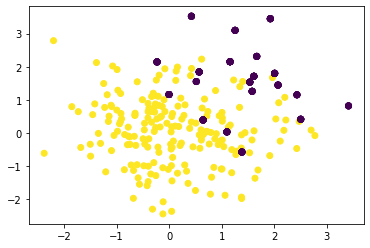

In [8]:

evaluate(oversampled_data)
plt.scatter(oversampled_data[:,0],oversampled_data[:,1], c = oversampled_data[:,2])
plt.show()



$\textbf{Question 4}$: How did the performance of the classifier change compared to the imbalanced version? Why?

**The accuracy decreased for the new oversampled data, but this is a positive thing as we don’t have the problem of including useless points, thus this data oversampling helps us analyse data better.**

### SMOTE

SMOTE (Synthetic Minority Oversampling Technique) is a popular method for generating artificial data samples. We can apply SMOTE when we are working with a dataset that is severely imbalanced. Instead of repeatedly sampling (with or without replacement) the existing data points, we can adapt a more systematic approach which allows us to generate new data points with similar characteristics to the existing instances of the minority class. As a brief recap, the technique works as follows:

1. Determine _k_ nearest neighbors of every instance in the minority class.
2. Randomly select a fraction of the _k_ nearest neighbors found for each instance from the minority class.
3. Generate a new data point between every minority instance and each of its selected _k_ nearest neighbors.

We will implement SMOTE to oversample the dataset in a more sophisticated way. We need a few helper functions first.

$\textbf{Exercise 6}$: Complete the functions.

In [9]:
def distance(a, b):
    """
    Calculate Euclidean distance between two points.
    
    Args
        a (numpy.ndarray): Vector representing a point in the classification space.
        b (numpy.ndarray): Vector representing a point in the classification space.
        
    Returns
        float: Euclidean distance between points `a` and `b`.
    """
    return np.sqrt(np.sum(np.power((a-b),2)))
    
    
    

In [10]:
def random_lerp(a, b):
    """
    Find a random point on the line between `a` and `b` using linear interpolation.
    
    Args
        a (numpy.ndarray): Vector representing a point in the classification space.
        b (numpy.ndarray): Vector representing a point in the classification space.
        
    Returns
        numpy.ndarray: A random point between `a` and `b`.
    """
    random_position = uniform(size=1)
    
    point = a + (b-a) * random_position
 
    return point

In [11]:
def nearest_neighbors(test_samples, data, k):
    """
    Find the `k` nearest neighbors for each of the test samples
    
    Args
        test_samples (numpy.ndarray): Selected set of samples from the taset, for example minority or majority class.
        data (numpy.ndarray): Dataset dawhere the nearest neighbors of `test_samples` should be found.
        k (int): Number of nearest neighbors that should be returned for each of the `test_samples`.
        
    Returns
        numpy.ndarray: Array of size `test_samples` x `k` with `k` nearest neighbors for each test sample
    """
    neighbors = []
    for i, x in enumerate(test_samples):
        distances= []
        for j, y in enumerate(data):
            if i!= j:
                distances.append((j,distance(x,y)))

        distances = sorted(distances, key=lambda t: t[1])
        distances = list(map(lambda t: t[0], distances))
        neighbors.append(np.array(distances[:k]))
        
    return np.array(neighbors)

In [12]:
# You can run this cell to test your code
test_data = np.array([[1.0, 1.0], [1.0, 2.0], [2.0, 3.0], [2.5, 3.0], [4.0, 4.0]])

assert np.isclose(distance(test_data[0], test_data[2]), 2.236, atol=1e-03)
assert np.isclose(distance(test_data[0], test_data[3]), 2.500, atol=1e-03)
assert np.array_equal(nearest_neighbors(test_data, test_data, 2), np.array([[1, 2], [0, 2], [3, 1], [2, 1], [3, 2]]))

$\textbf{Exercise 7}$: Implement the complete SMOTE algorithm using your helper functions.

In [13]:
def SMOTE(data, sampling_level, minority_label=0, k=3):
    """
    Applies SMOTE to generate a set of new instances from the minority class using nearest neighbors of existing observations.
    
    Args
        data (numpy.ndarray): Dataset containing the features along with their corresponding labels.
        sampling_level (float): Fraction of the NNs of each instance that should be used to generate new instances.
        minority_label (int): Label of the minority class in the dataset.
        k (int): Number of nearest neighbors that should be found for each of the minority instances.
        
    Returns
        numpy.ndarray: Array of newly generated minority instances.
    """
    sample_size = int(np.ceil(k * sampling_level))
    minority_samples = data[np.where(data[:, 2] == minority_label)][:, :2]
    
    sample_neighbors = None
    
    # Find the `k` nearest neighbors for each sample in `class_samples`
   
    sample_neighbors = nearest_neighbors(minority_samples, minority_samples, k)
  
    
    generated_samples = []
    
    # Iterate through all samples of the minority class
    for i, sample in enumerate(minority_samples):
        selected_neighbors = None
        selected_neighbors = []
        
        # Randomly (without replacement) select a subset of neighbors
        
     
        indices = choice(sample_neighbors.shape[1], sample_size, replace = False)
      
        for idx in indices:
            selected_neighbors.append(sample_neighbors[i, idx])
        
        # For each of the `selected_neighbors` generate a point between itself and the original sample
        
        for neigh in selected_neighbors:
            generated_samples.append(random_lerp(sample, minority_samples[neigh] ))
     
    
    # Add labels to the newly generated datapoints
    labels = np.full(len(generated_samples), minority_label).reshape(-1, 1)
    generated_samples = np.array(generated_samples)
    generated_samples = np.c_[generated_samples, labels]
            
    return generated_samples

In [14]:
new_samples = SMOTE(imbalanced_data, 0.6, k=15)
smote_data = np.r_[imbalanced_data, new_samples]

assert len(smote_data) == 400

$\textbf{Exercise 8}$: Train the `LogisticRegression` classifier on the SMOTE data and plot the instances.

Accuracy: 0.925 -- TPR: 0.9107142857142857 -- FPR: 0.0625


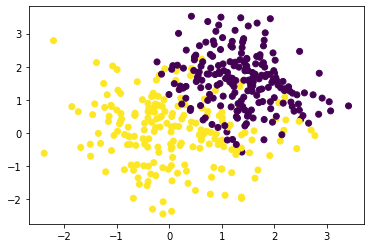

In [15]:

evaluate(smote_data)
plt.scatter(smote_data[:,0],smote_data[:,1], c = smote_data[:,2])
plt.show()



$\textbf{Question 5}$: How did the performance of the classifier change compared to the previous versions? 

**Accuracy improved compared with the previous oversampling technique, TPR increased adn the FPR decreased**

$\textbf{Question 6}$: What are the characteristics of the distribution generated by SMOTE? Does it resemble the "actual" distribution in the balanced dataset?  

**It balances the previously imbalanced data set, so it resembles the 'actual' distribution of the balanced tree**

$\textbf{Question 7}$: Can you imagine any situations where SMOTE would work poorly?  

**For two close points in the minority class, SMOTE, would generate points that are almost similar to these specfic 2**

$\textbf{Question 8}$: SMOTE generates new instances along the lines connecting all pairs of minority class samples. When the number of existing samples is low, this can lead to "blocky" distributions. Can you think of a way to adapt SMOTE so that it generates distributions that look more naturally?

**Use bi-linear interpolation between Feature 1 and Feature 2**

### Tomek Links

Finally, we will consider one more approach to addressing class imbalance. We will remove some datapoints $p_{i}$ that satisfy the following requirements:

1. $p_{i}$ belongs to the majority class
2. $n_{i}$ – the nearest neighbor of $p_{i}$ – belongs to the minority class.
3. $p_{i}$ is also the nearest neighbor of $n_{i}$

Points which satisfy this set of requirements are referred to as _Tomek Links_. Of course, we do not necessarily want to remove all Tomek Links from the dataset. Thus, we will specify a removal level and choose the number of instances from the majority class which will be tested based on this removal level.

$\textbf{Exercise 9}$: Implement the function `find_tomek_links`.

In [16]:
def find_tomek_links(data, removal_level, majority_label=1):
    """
    Test a random subset of points from the majority class for being Tomek Links and return them.
    
    Args
        data (numpy.ndarray): Dataset containing the features along with their corresponding labels.
        removal_level (float): Fraction of the majority class which should be tested for satisfying the properties.
        majority_label (int): Label of the majority class in the dataset.
        
    Returns
        numpy.ndarray: Tomek Links identified in the original dataset.
    """

    X = data[:, :2]
    y = data[:, 2]
    
    # We will find the 1-NN for every point in the dataset
    neighbors = nearest_neighbors(X, X, 1)  
    tomek_links = []
    
    majorities = np.array(np.where( y == majority_label)).reshape((200, ))
    sample_size = int(np.ceil(np.size(majorities) * removal_level))
    
    samples = choice(majorities,sample_size, replace = False)
    for i in samples:
        if (neighbors[neighbors[i]] == i and y[neighbors[i]]!= majority_label):
            tomek_links.append(i)
    

            
    return np.array(tomek_links)

In [17]:
tomek_links = find_tomek_links(smote_data, 0.1)
tomek_data = np.delete(smote_data, tomek_links, axis=0)
assert len(tomek_links) == 1

$\textbf{Exercise 10}$: Train the `LogisticRegression` classifier one last time and plot the instances. Also plot the Tomek Links which were found by your method.

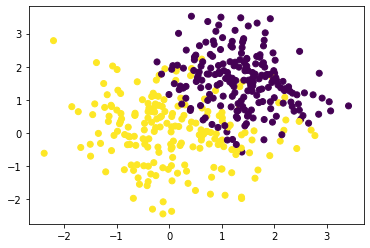

Accuracy: 0.95 -- TPR: 0.9491525423728814 -- FPR: 0.04918032786885246


In [18]:

X_tomek_train, X_tomek_test, y_tomek_train, y_tomek_test = train_test_split(tomek_data[:,:-1], tomek_data[:,-1], test_size=0.3, random_state=random_state)
classifier = LogisticRegression(random_state=random_state).fit(X_tomek_train, y_tomek_train)
y_tomek_predicted = classifier.predict(X_tomek_test)

plt.scatter(tomek_data[:, 0], tomek_data[:, 1], c = tomek_data[:, 2])
plt.show()

tomek_acc, tomek_tpr, tomek_fpr = evaluate(tomek_data)



$\textbf{Question 9}$: Did removing Tomek Links further improve the performance?

**Yes as the accuracy and TPR increased significantly, whilst FPR decreased.**

$\textbf{Question 10}$: Why do you think removing only a single point may have such impact on the performance?

**As we change the trainig data thus we get a different decision boundary**